# **Assignment Four on 02/07/2024**

## **Installing PRAW package**

In [4]:
# Install package praw which allows us to intract with Reddit API using Python
#!pip install praw  

## **Authentication**

In [5]:
import praw  # Importing praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" 
reddit = praw.Reddit(
    client_id="TjDs35RvVf7zqcgc8BrEQw", # My User ID
    client_secret="LNU5kTy-ij320beV7lLzfwqh0RlcUw", # My User client Key
    user_agent=user_agent
)

## **Importing required packages such as Pandas, Numpy, Re.**

In [6]:
import pandas as pd  # Importing Pandas as pd
import numpy as np   # Importing numpy as np
import re            # RegEx : Regular expression

## **Get Trending Topic from your Subreddit**

The **"Brooklyn"** subreddit channel will be use for this project

In [7]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Brooklyn").hot(limit=None): # Using Trending Topic as Bitcoin
    print(submission.title)# Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Be Aware on the N
1bpwjul
Damage-Many
1711635035.0
88
0.92
https://i.redd.it/7ns6wrqq13rc1.jpeg
0


 ## **Get total comment in Subreddit**

In [24]:
headlines = set()
for submission in reddit.subreddit("Brooklyn").hot(limit=None): # Retreving the tittle of hot posts in Brooklyn subreddit.
    headlines.add(submission.title)
print(len(headlines)) # Printing the no of Unique Headlines

947


## **Creating a DataFrame.**

In [25]:
#Create a dataframe from the scrapped data 
bridge_df = pd.DataFrame(headlines)
bridge_df.head() # Printing the top Five Rows

,0
0,Snowy sleepy Crown Heights
1,Fried chicken spot
2,Found ring in Crown Heights!
3,How is the area near Tivoli Towers in Crown He...
4,Mr. Bao Asian Kitchen Popcorn Chicken


In [26]:
bridge_df.head() # Printing the Top Five Rows

,0
0,Snowy sleepy Crown Heights
1,Fried chicken spot
2,Found ring in Crown Heights!
3,How is the area near Tivoli Towers in Crown He...
4,Mr. Bao Asian Kitchen Popcorn Chicken


## **Adding Column Names**

In [27]:
bridge_df.columns # Printing the Column Names.

RangeIndex(start=0, stop=1, step=1)

In [28]:
bridge_df.columns = ['Titles'] # Adding Column Names


In [29]:
bridge_df_df.head() # Printing top Five Rows

,Titles
0,Snowy sleepy Crown Heights
1,Fried chicken spot
2,Found ring in Crown Heights!
3,How is the area near Tivoli Towers in Crown He...
4,Mr. Bao Asian Kitchen Popcorn Chicken


## **Checking For Duplictes.**

In [30]:
bridge_df_df.Titles.duplicated().sum()   # Printing the Sum of Duplicates.

0

## **Cleaning the TExt**

In [32]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bridge_df_df["Titles"]= war_df["Titles"].apply(cleanTxt)

#Show the clean text
bridge_df_df.head()

,Titles
0,Snowy sleepy Crown Heights
1,Fried chicken spot
2,Found ring in Crown Heights!
3,How is the area near Tivoli Towers in Crown He...
4,Mr. Bao Asian Kitchen Popcorn Chicken


In [33]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bridge_df_df["Titles"]= war_df["Titles"].apply(remove_emoji)

#Show the clean text
bridge_df_df.head()

,Titles
0,Snowy sleepy Crown Heights
1,Fried chicken spot
2,Found ring in Crown Heights!
3,How is the area near Tivoli Towers in Crown He...
4,Mr. Bao Asian Kitchen Popcorn Chicken


## **Installing Textblob**

In [34]:
#!pip install textblob

In [35]:
from textblob import TextBlob ## Importing TextBlob
from wordcloud import WordCloud, STOPWORDS  

In [36]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
war_df['Subjectivity'] = war_df['Titles'].apply(getSubjectivity)
war_df['Polarity'] = war_df['Titles'].apply(getPolarity)

#Now display data
war_df.head()

,Titles,Subjectivity,Polarity
0,Snowy sleepy Crown Heights,0.000,0.0
1,Fried chicken spot,0.950,-0.6
2,Found ring in Crown Heights!,0.000,0.0
3,How is the area near Tivoli Towers in Crown He...,0.400,0.1
4,Mr. Bao Asian Kitchen Popcorn Chicken,0.475,-0.3


In [37]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bridge_df_df["Insight"] = war_df["Polarity"].apply(getInsight)
bridge_df_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Snowy sleepy Crown Heights,0.000000,0.000000,Neutral
1,Fried chicken spot,0.950000,-0.600000,Negative
2,Found ring in Crown Heights!,0.000000,0.000000,Neutral
3,How is the area near Tivoli Towers in Crown He...,0.400000,0.100000,Positive
4,Mr. Bao Asian Kitchen Popcorn Chicken,0.475000,-0.300000,Negative
5,I can’t find shoelaces for sale!,0.000000,0.000000,Neutral
6,Massive Bird on my Balcony! Sheepshead Bay,1.000000,0.000000,Neutral
7,Snow shots from this week!,0.000000,0.000000,Neutral
8,inline hockey pickup ?? anyone know of any act...,0.600000,-0.133333,Negative
9,Brighton Beach - Little Odessa by the Sea,0.500000,-0.187500,Negative


## **Data Visualization**

In [38]:
import seaborn as sns # Importing seaborn Package
import warnings 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt # Importing matplotlib.pyplot
plt.style.use('fivethirtyeight')

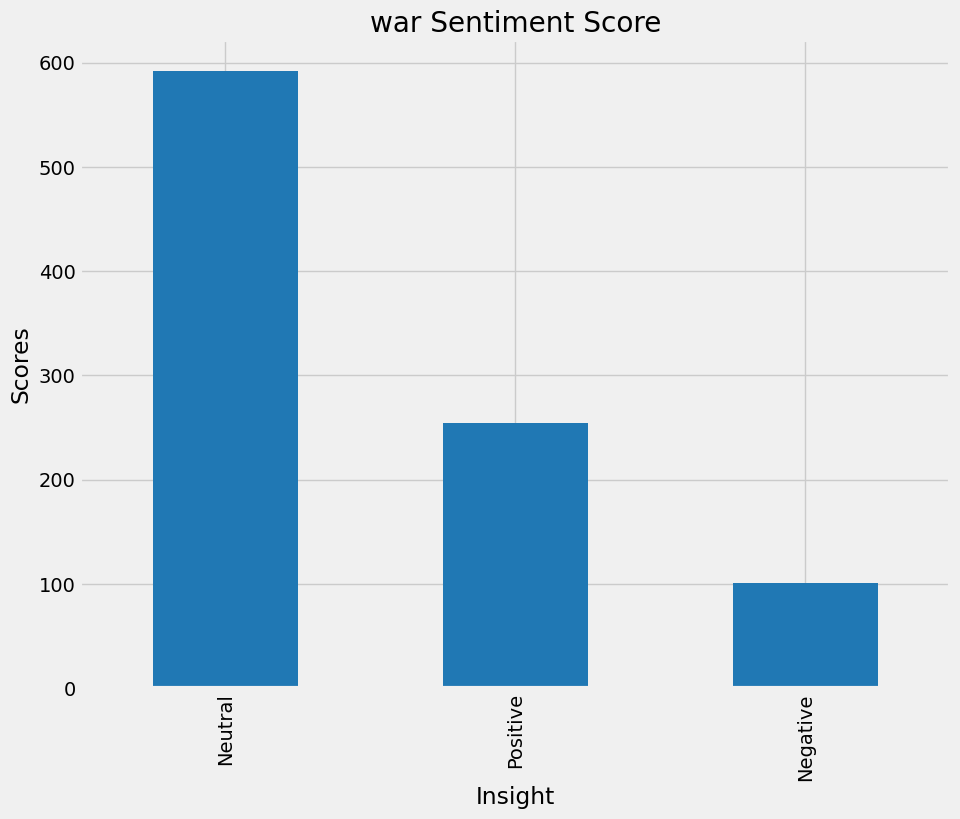

In [39]:
#Plot the values count of sentiment
plt.title("war Sentiment Score")
plt.xlabel("Sentiment") # X-axis
plt.ylabel("Scores") # Y-axis
plt.rcParams["figure.figsize"] = (10,8) # Figure Size
bridge_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

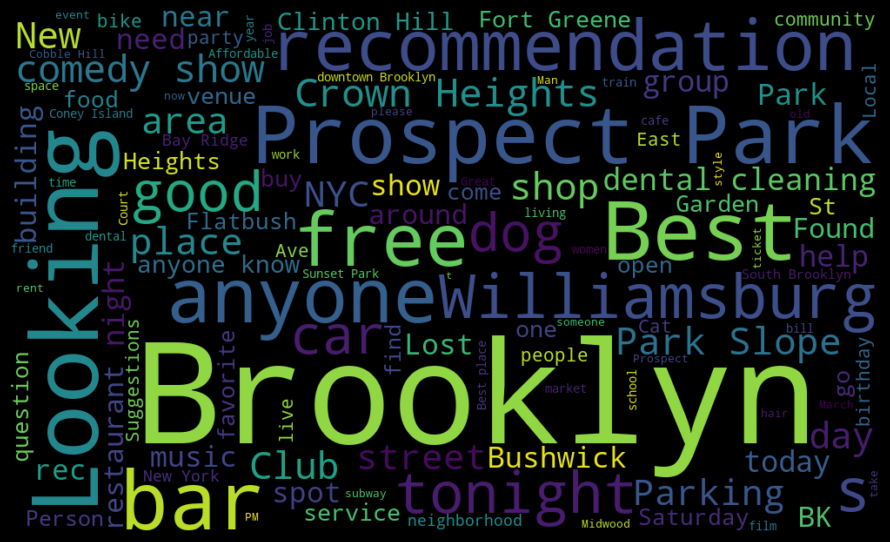

In [40]:
text = ' '.join( [twts for twts in bridge_df['Titles']] ) # To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 120,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(10,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");